In [1]:
# 필요한 모듈 설치
! pip install numpy
! pip install pandas
! pip install matplotlib

You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 7.5/7.5 MB 68.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 KB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 65.5 MB/s eta 0:00:00
     ---------------------------------------- 429.4/429.4 KB ? eta 0:00:00
     ---------------------------------------- 98.3/98.3 KB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 53.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# 필요한 모듈 불러오기
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# NFLX csv 파일을 numpy array형태로 생성
nflx_arr = np.loadtxt('C:/Users/SSAFY/Desktop/pjt_prac/pjt/02-pjt/ver-1/NFLX.csv', delimiter=",", encoding='cp949', dtype=str)
nflx_arr

# Data, Open, High, Low, Close 필드만 읽어오기

array([['Date', 'Open', 'High', ..., 'Close', 'Adj Close', 'Volume'],
       ['2018-02-05', '262.000000', '267.899994', ..., '254.259995',
        '254.259995', '11896100'],
       ['2018-02-06', '247.699997', '266.700012', ..., '265.720001',
        '265.720001', '12595800'],
       ...,
       ['2022-02-02', '448.250000', '451.980011', ..., '429.480011',
        '429.480011', '14346000'],
       ['2022-02-03', '421.440002', '429.260010', ..., '405.600006',
        '405.600006', '9905200'],
       ['2022-02-04', '407.309998', '412.769989', ..., '410.170013',
        '410.170013', '7782400']], dtype='<U10')

# A. 데이터 전처리 - 데이터 읽어오기
- Pandas 를 사용하여 csv 파일(NLFX.csv)을 DataFrame 으로 읽어옵니다.-  이 때, [ ‘Data’, ‘Open’, ‘High’, ‘Low’, ‘Close’ ] 필드만 읽어오도록 구성합니다.시

In [10]:
# NFLX csv 파일을 numpy array형태로 생성
# 2018-02-05 ~ 2022-02-04
nflx_arr = np.loadtxt('C:/Users/SSAFY/Desktop/pjt_prac/pjt/02-pjt/ver-1/NFLX.csv', delimiter=",", encoding='cp949', dtype=str)
nflx_arr

# Data, Open, High, Low, Close 필드만 읽어오기
# Header, dataset 설정
header = nflx_arr[0, :5]
data = nflx_arr[1:, :5]

# 데이터프레임 생성
nflx_df = pd.DataFrame(data, columns = header)
nflx_df.head()

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


# B. 데이터 전처리 – 2021년 이후의 종가 데이터 출력하기- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.-  [힌트] 필터링이 가능한 형식으로 데이터 타입을 변경한 후 필터링을 진행합니다
- • Pandas 의 to_datetime() 을 활용합니다- 
• 필터링이 완료된 DataFrame 의 종가 데이터를 Matplotlib 를 사용하여 시각화 합니다. 

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15584\963594959.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after2021_df['Open'] = after2021_df['Open'].astype('float')
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15584\963594959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after2021_df['High'] = after2021_df['High'].astype('float')
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15584\963594959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

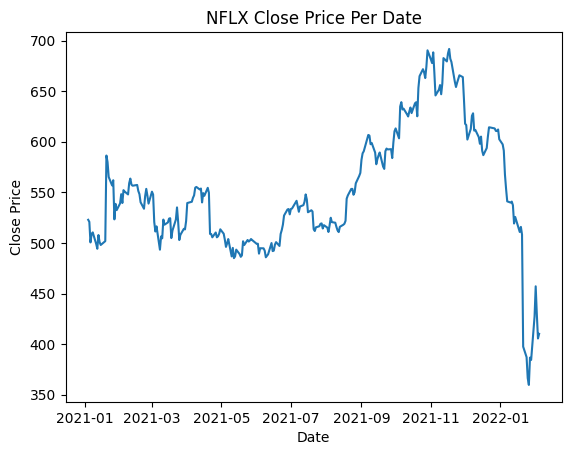

In [89]:
# df에서 데이터 필터링하기
# pd.to_datetime()을 활용하여 Date의 dtype을 datetime64로 변경
nflx_df['Date'] = pd.to_datetime(nflx_df['Date'])

# 2021년 이후 데이터만 추출하여 df 생성
after2021_df = nflx_df[nflx_df['Date'].dt.year >= 2021]

# 각 col의 데이터셋을 float형으로 변경
after2021_df['Open'] = after2021_df['Open'].astype('float')
after2021_df['High'] = after2021_df['High'].astype('float')
after2021_df['Low'] = after2021_df['Low'].astype('float')
after2021_df['Close'] = after2021_df['Close'].astype('float')


X = after2021_df['Date']
y = after2021_df['Close']
# 시각화
plt.plot(X, y)
plt.title('NFLX Close Price Per Date')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


# C. 데이터 분석 – 2021년 이후 최고, 최저 종가 출력하기- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.-  종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력합니다.- • Pandas 의 내장 함수를 사용합니다


In [90]:
print('최고 종가:', after2021_df['Close'].max())
print('최저 종가:', after2021_df['Close'].min())

최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.- 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화 합니다.




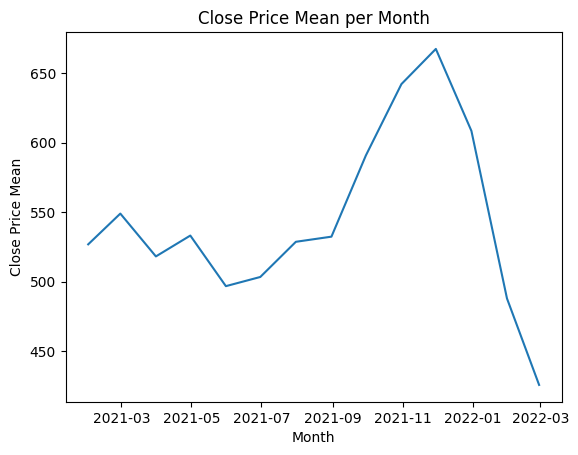

In [96]:
# month_grouped_close_mean(mgcm_df) 생성
mgcm_df = after2021_df.groupby(pd.Grouper(key = 'Date', freq = 'M'))['Close'].mean().reset_index()

X = mgcm_df['Date']
y = mgcm_df['Close']

plt.plot(X, y)
plt.title('Close Price Mean per Month')
plt.xlabel('Month')
plt.ylabel('Close Price Mean')
plt.show()

# E. 데이터 시각화 – 2022년 이후 최고, 최저, 종가 시각화하기- csv 파일을 DataFrame 으로 읽어와 2022년 이후의 데이터만 필터링합니다.-  Matplotlib 를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 아래와 같이 시각화 합니다


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15584\192651172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after2022_df['Open'] = after2022_df['Open'].astype('float')
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15584\192651172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after2022_df['High'] = after2022_df['High'].astype('float')
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15584\192651172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

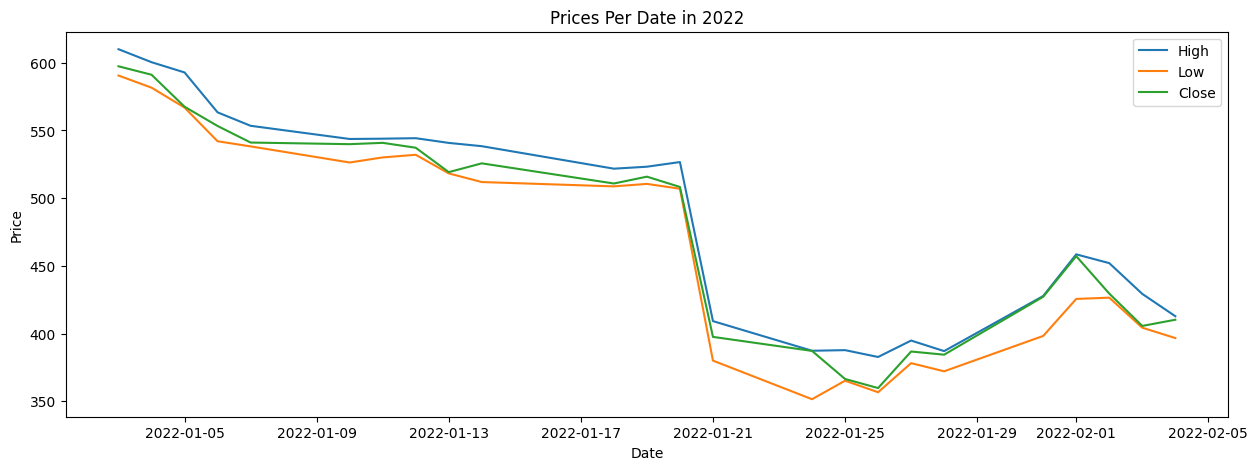

In [102]:
# 2022년 이후 데이터만 추출한 df 생성
after2022_df = nflx_df[nflx_df['Date'].dt.year >= 2022]

# 각 col의 데이터셋을 float형으로 변경
after2022_df['Open'] = after2022_df['Open'].astype('float')
after2022_df['High'] = after2022_df['High'].astype('float')
after2022_df['Low'] = after2022_df['Low'].astype('float')
after2022_df['Close'] = after2022_df['Close'].astype('float')

# 설명변수 설정
X = after2022_df['Date']

# 종속변수 설정
High = after2022_df['High']
Low = after2022_df['Low']
Close = after2022_df['Close']


# 시각화 진행
# 한 그래프 내에 세 가지 plot 비교 -> plt.subplots()
fig, ax = plt.subplots(figsize = (15, 5))

ax = plt.plot(X, High, label = 'High')
ax = plt.plot(X, Low, label = 'Low')
ax = plt.plot(X, Close, label = 'Close')
plt.title('Prices Per Date in 2022')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()